In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

### Evaluation 

In [73]:
patients_healthy = []
patients_really_unhealthy = [] 
patients_semi_unhealthy = []
label_dict = {}
n_total = 0 
abn_total = 0 
for i in range(len(patients_left)): 
    
    mit_bih = MIT_BIH([patients_left[i]],data_beats_train)
    #print('train ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_train = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    mit_bih = MIT_BIH([patients_left[i]],data_beats_test)
    #print('test ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_test = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    #if fraction_train + fraction_test == 0: 
   #     patients_healthy.append(i)
   #     print('patient ',patients_left[i])
   #     label_dict[i] = 0 
   # else: 

    N= np.count_nonzero(data_beats_train[patients_left[i]]['class']=='N') +np.count_nonzero(data_beats_val[patients_left[i]]['class']=='N')+np.count_nonzero(data_beats_test[patients_left[i]]['class']=='N')
    V = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='V') +np.count_nonzero(data_beats_val[patients_left[i]]['class']=='V')+np.count_nonzero(data_beats_test[patients_left[i]]['class']=='V')
    S = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='S') +np.count_nonzero(data_beats_val[patients_left[i]]['class']=='S') +np.count_nonzero(data_beats_test[patients_left[i]]['class']=='S') 
    F = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='F') + np.count_nonzero(data_beats_val[patients_left[i]]['class']=='F') + np.count_nonzero(data_beats_test[patients_left[i]]['class']=='F')
    n_total += N 
    abn_total += V + S + F
    print('patient ',patients_left[i])
    print('N: ',N)
    print('V: ',V)
    print('S: ',S)
    print('F: ',F)
    if V+S+F >= 10: 
        patients_really_unhealthy.append(i)
        label_dict[i] = 2
    else: 
        patients_healthy.append(i)
        label_dict[i] = 0
print('healthy patients: ',patients_healthy)
print('very unhealthy patients: ',patients_really_unhealthy)

patient  100
N:  376
V:  0
S:  3
F:  0
patient  101
N:  311
V:  0
S:  0
F:  0
patient  103
N:  347
V:  0
S:  0
F:  0
patient  106
N:  265
V:  73
S:  0
F:  0
patient  108
N:  291
V:  3
S:  0
F:  0
patient  109
N:  415
V:  5
S:  0
F:  2
patient  111
N:  354
V:  0
S:  0
F:  0
patient  112
N:  423
V:  0
S:  0
F:  0
patient  113
N:  298
V:  0
S:  1
F:  0
patient  115
N:  326
V:  0
S:  0
F:  0
patient  116
N:  395
V:  7
S:  0
F:  0
patient  117
N:  256
V:  0
S:  0
F:  0
patient  118
N:  365
V:  4
S:  11
F:  0
patient  119
N:  250
V:  81
S:  0
F:  0
patient  121
N:  311
V:  0
S:  0
F:  0
patient  122
N:  413
V:  0
S:  0
F:  0
patient  123
N:  253
V:  0
S:  0
F:  0
patient  124
N:  264
V:  2
S:  4
F:  0
patient  200
N:  300
V:  132
S:  2
F:  0
patient  203
N:  428
V:  66
S:  3
F:  0
patient  205
N:  443
V:  0
S:  0
F:  0
patient  208
N:  261
V:  161
S:  0
F:  71
patient  210
N:  409
V:  31
S:  1
F:  1
patient  212
N:  458
V:  0
S:  0
F:  0
patient  214
N:  337
V:  40
S:  0
F:  0
patient  215
N

In [74]:
print(abn_total)
print(n_total)
print(n_total/(abn_total+n_total))

1274
11435
0.8997560783696593


In [75]:
experiment = 'BIH_bandits_5_1'
new_tried = []
new = []
regret = []
i = 99 
phi = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi'+str(i)+'.txt'))
phi_UCB = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi_UCB'+str(i)+'.txt'))

all_patients = np.arange(len(patients_left))
unhealthy_patients = [x for x in all_patients if x not in patients_healthy]

blub = phi[patients_healthy,:]
blub2 = phi[patients_really_unhealthy,:]


score = 0 
score2 = 0 
score_a = 0 
score_b = 0 
for row in range(len(patients_left)): # check if the healthy patients mainly collaborate with other healthy patients
    if row in patients_healthy: 
        score += np.sum(blub[:,row])
        score_b += np.sum(blub2[:,row])
    else: 
        score2 += np.sum(blub[:,row])
        score_a += np.sum(blub2[:,row])
        
unhealthy_patients = len(patients_left) - len(patients_healthy) 
print(score / len(patients_healthy))
print(score2 / len(patients_really_unhealthy))
print(score_b / len(patients_healthy))
print(score_a / len(patients_really_unhealthy))

303.2
32.5
7.7
14.071428571428571


In [76]:
print(phi)

[[ 0.  0.  0. ...  0.  0.  8.]
 [ 1.  0. 65. ...  0.  0.  1.]
 [ 1. 83.  0. ...  0.  0.  1.]
 ...
 [ 1. 33. 32. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [77]:
unhealthy_dict = {}
for idx, i in enumerate(patients_really_unhealthy): 
    unhealthy_dict[idx] = patients_left[i]

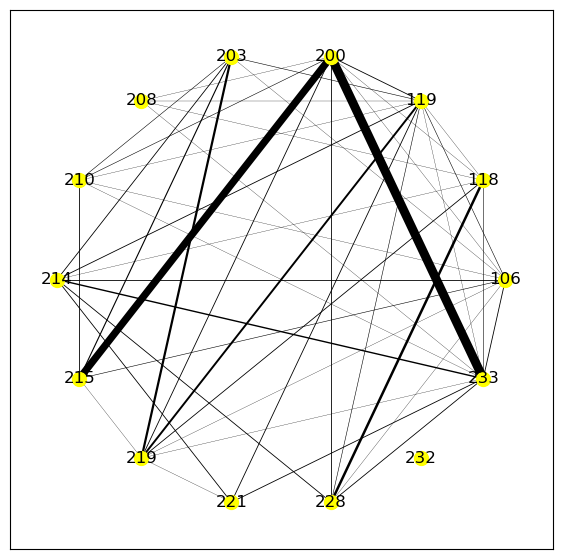

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#print(phi)
phi_binary =np.array(np.array(phi,dtype='bool'),dtype='int')
#print(phi_binary)
phi_graph = nx.from_numpy_matrix(phi/10)

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(g,partition):
# to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    #g = nx.karate_club_graph()
    #partition = community_louvain.best_partition(g)
    print(partition)
    pos = community_layout(g, partition)

    #nx.draw(g, pos, node_color=list(dict_partition.values())); plt.show()
    
    nodelist = g.nodes()
    widths = nx.get_edge_attributes(g,'weight')
    cmap = plt.cm.get_cmap('cool')#Spectral
    maxval = 2 
    plt.figure(figsize=(7,7))
    nx.draw_networkx_nodes(g,pos,nodelist=nodelist,node_size=10,
                          node_color= [cmap(v/maxval) for v in partition.values()])#list(partition.values()))
    print(list(partition.values()))
    labels = ['healthy','moderately unhealthy','very unhealthy']
    for v in set(partition.values()):
        plt.scatter([],[],c=[cmap(v/maxval)],label=labels[v])
    
    nx.draw_networkx_edges(g,pos,edgelist=widths.keys(),width=list(widths.values()),edge_color='k')
    plt.legend()
    plt.show()
    
    
    return

def test2(partition):
    blub2 = phi[patients_really_unhealthy,:]
    blub3 = blub2[:,patients_really_unhealthy]
    g = nx.from_numpy_matrix(blub3/5)
    pos = nx.circular_layout(g)
    pos_higher = {}
    y_off = 0.1 
    for k,v in pos.items():
        pos_higher[k] = (v[0],v[1]+y_off)
    
    nodelist = g.nodes()
    widths = nx.get_edge_attributes(g,'weight')
    cmap = plt.cm.get_cmap('cool')#Spectral
    maxval = 2 
    plt.figure(figsize=(7,7))
    nx.draw_networkx_nodes(g,pos,nodelist=nodelist,node_size=100,
                          node_color= 'yellow'
                          )#list(partition.values()))
    

    labels = ['healthy','moderately unhealthy','very unhealthy']
    for v in [2]:
        plt.scatter([],[],c=[cmap(1)],label=labels[v])
    
    nx.draw_networkx_edges(g,pos,edgelist=widths.keys(),width=list(widths.values()),edge_color='black')
    nx.draw_networkx_labels(g,pos,unhealthy_dict)
    #plt.legend()
    plt.savefig(os.path.join('checkpoints_bandits',experiment,'graph.pdf'))
    plt.show()
    
    
    return
#test(phi_graph,label_dict)
test2(label_dict)

### Code

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import binom 

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init

from collections import Counter
import operator
import copy 
from itertools import product,combinations
from time import time 
#from IPython.core.display import display

%matplotlib inline

## code extracted from https://www.kaggle.com/code/graymant/breast-cancer-diagnosis-with-pytorch
## SV code extracted from https://github.com/mburaksayici/ExplainableAI-Pure-Numpy/blob/main/KernelSHAP-Pure-Numpy.ipynb

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [66]:
import os
import sys
from os.path import join as osj
from bisect import bisect
from collections import defaultdict 
import pickle
import json
import wfdb

def read_dict_beats():
    with open(DICT_BEATS, "rb") as f:
        return pickle.load(f)
    
def read_data_beats():
    with open(DATA_BEATS, "rb") as f:
        return pickle.load(f)
    
def ensure_normalized_and_detrended(beats):
    for key in beats.keys():
        b = beats[key]["beats"]
        if not np.allclose(np.linalg.norm(b, axis=1, ord=2), 1):
            raise AssertionError(f"Beats of patient {key} is not normalized.")
            
        p = np.polyfit(np.arange(b.shape[1]), b.T, deg=1)
        if not np.allclose(p, 0):
            raise AssertionError(f"Beats of patient {key} is not detrended.")

DATA_ROOT = osj("/mimer/NOBACKUP/groups/snic2022-22-122/arthur/", "dataset_beats")
DICT_BEATS = osj(DATA_ROOT, "5min_normal_beats.pkl")
DATA_BEATS = osj(DATA_ROOT, "30min_beats.pkl")

DATA_ROOT = "/mimer/NOBACKUP/groups/snic2022-22-122/arthur/physionet.org/files/mitdb/1.0.0/"
RECORDS = osj(DATA_ROOT, "RECORDS")
print(RECORDS)
patient_ids = pd.read_csv(RECORDS,  header=None).to_numpy().reshape(-1)
print(patient_ids)
def get_paced_patients(patient_ids):
    paced = []
    for id_ in patient_ids:
        annotation = wfdb.rdann(osj(DATA_ROOT, str(id_)), extension='atr')
        labels = np.unique(annotation.symbol)
        if ("/" in labels):
            paced.append(id_)
    return np.array(paced)
paced_patients = get_paced_patients(patient_ids)
excluded_patients = np.array([105, 114, 201, 202,207, 209, 213, 222, 223, 234]) # according to paper 
print(np.concatenate((paced_patients,excluded_patients)))


dict_beats = read_dict_beats()
data_beats = read_data_beats()
ensure_normalized_and_detrended(dict_beats)
ensure_normalized_and_detrended(data_beats)

#patient_ids = pd.read_csv(osj("..", "files", "patient_ids.csv"), header=None).to_numpy().reshape(-1)
#paced_patients = pd.read_csv(osj("..", "files", "paced_patients.csv"), header=None).to_numpy().reshape(-1)
#excluded_patients = pd.read_csv(osj("..", "files", "excluded_patients.csv"), header=None).to_numpy().reshape(-1)

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/physionet.org/files/mitdb/1.0.0/RECORDS
[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]
[102 104 107 217 105 114 201 202 207 209 213 222 223 234]


In [67]:
#print(np.shape(dict_beats))
import collections
print(dict_beats.keys())
patients_out = np.concatenate((paced_patients,excluded_patients))
print(patients_out)
patients_left = list(copy.deepcopy(patient_ids))

for idx,i in enumerate(patient_ids):
    if i in patients_out: 
        patients_left.remove(i)
        
print(patients_left)

#print(dict_beats[101]['beats'])
#print(dict_beats[101]['class'])
labels = ['N','V','S','Q','F']
dictionary = {}
for i in labels: 
    dictionary[i] = 0
    
list1 = []
array = np.zeros((len(patients_left),2))
labels2 = []
for idx,i in enumerate(patients_left):
    for ii in data_beats[i]['label']:
        if ii not in labels2: 
            labels2.append(ii)
    #print(len(data_beats[i]['class']))
    list1.append(data_beats[i]['class'])
    counter = collections.Counter(data_beats[i]['class'])
    for j in counter.keys():
        dictionary[j] += counter[j]
        if j == 'N':
            array[idx,0] += counter[j]
        else: 
            array[idx,1] += counter[j]
print(labels2)

dict_keys([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234])
[102 104 107 217 105 114 201 202 207 209 213 222 223 234]
[100, 101, 103, 106, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 203, 205, 208, 210, 212, 214, 215, 219, 220, 221, 228, 230, 231, 232, 233]
['N', 'A', 'V', 'Q', 'F', 'j', 'L', 'a', 'R', 'J', 'S', 'E']


In [23]:
def get_base_model(in_channels):
    """
    Returns the model from paper: Personalized Monitoring and Advance Warning System for Cardiac Arrhythmias.
    """
    # Input size: 128x1
    # 128x1 -> 122x32 -> 40x32 -> 34x16 -> 11x16 -> 5x16 -> 1x16
    model = nn.Sequential(
        nn.Conv1d(in_channels, 32, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Conv1d(32, 16, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Conv1d(16, 16, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Flatten(),

        nn.Linear(16, 32, bias=True),
        nn.ReLU(),

        nn.Linear(32, 2, bias=True),
           
    )
    return model

In [69]:
#AAMI standards: only use the first 5 seconds, only use 'healthy' heartbeats for training. 
#They combine each client's dataset with other clients' datasets (with domain Adaptation)
# and test on the other 25 seconds + the abnormal heartbeats of the client. 


def train_test_split(data_beats,seconds=5,factor=0.8): 
    data_beats_train = {}
    data_beats_val = {}
    data_beats_test = {}
    for i in data_beats.keys(): 
        data_beats_train[i] = {'class':None, 'beats':None}
        data_beats_val[i] = {'class':None, 'beats':None}
        data_beats_test[i] ={'class':None, 'beats':None}
    
    for patient in data_beats.keys(): 
        length = int(np.ceil(len(data_beats[patient]['beats'])*(seconds/30))) # only take first 5 seconds
        
        random_test = np.arange(length)
        random_train = np.random.choice(random_test,size=int(np.ceil(0.8*length)),replace=False)
        for ii in random_train: 
            index = np.where(random_test == ii)[0]
            random_test = np.delete(random_test,index)
            
        random_val = np.arange(int(np.ceil(0.8*length)))
        random_train = np.random.choice(random_val,size=int(np.ceil(0.8*0.8*length)),replace=False)
        for ii in random_train: 
            index = np.where(random_val == ii)[0]
            random_val = np.delete(random_val,index)
 
        data_beats_train[patient]['class'] = data_beats[patient]['class'][np.sort(random_train)]
        data_beats_test[patient]['class'] = data_beats[patient]['class'][random_test]
        data_beats_val[patient]['class'] = data_beats[patient]['class'][random_val]
        data_beats_train[patient]['beats'] = data_beats[patient]['beats'][np.sort(random_train)]
        data_beats_test[patient]['beats'] = data_beats[patient]['beats'][random_test]
        data_beats_val[patient]['beats'] = data_beats[patient]['beats'][random_val]
        
    
    return data_beats_train, data_beats_val, data_beats_test 
#print(data_beats_train)
seconds = 5
data_beats_train, data_beats_val, data_beats_test  = train_test_split(data_beats,seconds)

In [70]:
import copy
class MIT_BIH(Dataset):
    def __init__(self,patients,data):
        self.patients = patients 
        self.data = data 
        self.to_one_dataset()
        
    def to_one_dataset(self): 
        data_vector = torch.zeros(self.__len__(),128)
        labels_vector = torch.zeros(self.__len__())
        k = 0 
        for i,patient in enumerate(self.patients): 
            data_vector[k:k+len(self.data[patient]['beats']),:] = torch.from_numpy(self.data[patient]['beats'])
            classes = copy.deepcopy(self.data[patient]['class'])
            indices = classes=='N'
            indices2 = classes!='N'
            classes[indices] = 0
            classes[indices2] = 1
            classes = np.array(classes,dtype='int')
            labels_vector[k:k+len(self.data[patient]['beats'])] = torch.from_numpy(classes)
            k += len(self.data[patient]['beats']) 
        self.y = labels_vector.long()
        self.X = data_vector.double()

    def __len__(self): 
        length_total = 0 
        for patient in self.patients: 
            length_total += len(self.data[patient]['beats'])
           # print(len(self.data[patient]['beats']))
        return length_total
        
    def __getitem__(self,idx):
        return (self.X[idx,:],self.y[idx])
mit_bih = MIT_BIH(patients_left,data_beats_train)
x_sample,y_sample = mit_bih.__getitem__(0)
dataloader = DataLoader(mit_bih,batch_size=32,shuffle=True,num_workers=0)
mit_bih_test = MIT_BIH(patients_left,data_beats_val)
x_sample,y_sample = mit_bih_test.__getitem__(0)
dataloader_test = DataLoader(mit_bih_test,batch_size=32,shuffle=False,num_workers=0)

In [71]:
patients_healthy = []
for i in range(len(patients_left)): 
    
    mit_bih = MIT_BIH([patients_left[i]],data_beats_train)
    #print('train ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_train = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    mit_bih = MIT_BIH([patients_left[i]],data_beats_test)
    #print('test ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_test = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    if fraction_train == 0: 
        patients_healthy.append(patients_left[i])
    else: 
        print('patient ',i)
        print('V: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='V'))
        print('S: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='S'))
        print('F: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='F'))
print('healthy patients: ',patients_healthy)
    

patient  0
V:  0
S:  3
F:  0
patient  3
V:  48
S:  0
F:  0
patient  4
V:  3
S:  0
F:  0
patient  5
V:  4
S:  0
F:  2
patient  8
V:  0
S:  1
F:  0
patient  10
V:  4
S:  0
F:  0
patient  12
V:  2
S:  5
F:  0
patient  13
V:  52
S:  0
F:  0
patient  18
V:  91
S:  1
F:  0
patient  19
V:  36
S:  2
F:  0
patient  21
V:  105
S:  0
F:  43
patient  22
V:  18
S:  0
F:  1
patient  24
V:  26
S:  0
F:  0
patient  25
V:  28
S:  0
F:  0
patient  26
V:  9
S:  0
F:  1
patient  28
V:  47
S:  0
F:  0
patient  29
V:  42
S:  0
F:  0
patient  31
V:  1
S:  0
F:  0
patient  32
V:  0
S:  140
F:  0
patient  33
V:  99
S:  2
F:  2
healthy patients:  [101, 103, 111, 112, 115, 117, 121, 122, 123, 124, 205, 212, 220, 230]


In [13]:
print(len(dataloader_test))
print(len(dataloader))
print(len(mit_bih))

64
255
102


In [39]:
class P2P_AFPL():
       
    def __init__(self,patients_left,train_data,test_data,test='local'): 
        self.selected_clients = patients_left
        self.network = get_base_model(1)
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000 
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test 
        self.total_clients = len(self.selected_clients)  
        self.patients_left = patients_left
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.dataloaders_test = {}
        if self.test == 'AFPL':
            self.client_models_global = {}
            
        if self.test == 'bandits': 
            self.comb_UCB = combinatorial_UCB(self.total_clients)
        
        for idx,i in enumerate(self.patients_left):
            self.client_models[str(idx)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(idx)] = torch.optim.SGD(self.client_models[str(idx)].parameters(),lr=0.01,momentum=0.5)
            dataset_train=  MIT_BIH([self.patients_left[idx]],train_data)
            self.len[str(idx)] = len(dataset_train)
            self.dataloaders[str(idx)] = DataLoader(dataset_train,batch_size=32,shuffle=True,num_workers=0)
            
            dataset_test= MIT_BIH([self.patients_left[idx]],test_data)
            self.len_test[str(idx)] = len(dataset_test)
            self.dataloaders_test[str(idx)] = DataLoader(dataset_test,batch_size=32,shuffle=False)
            self.best_test_loss[str(idx)] = 10000000 
            self.current_test_loss[str(idx)] = 100000 
            self.current_train_loss[str(idx)] = 1000000 
            if self.test == 'AFPL':
                self.client_models_global[str(idx)] = copy.deepcopy(self.network).double().cuda()
                self.shared_model = copy.deepcopy(self.network).double().cuda()
        self.dataset_train = dataset_train
        
    def update_local_models(self,selected_clients):
        self.dw = {}
        loss_test = 0 
        loss_test2 = 0 
        losses = 0 
        losses2 = 0 
        loss_test3 = 0 
        losses3 = 0 
        
        for idx,i in enumerate(selected_clients): 
            
            dataloader = self.dataloaders[str(i)]
            optimizer= torch.optim.Adam(self.client_models[str(i)].parameters(),lr=0.001*0.95**self.iteration)
            self.client_models[str(i)].train()
            
            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.shared_model)
                self.client_models_global[str(i)].train()
                optimizer_global = torch.optim.Adam(self.client_models_global[str(i)].parameters(),lr=0.001*0.95**self.iteration)
            
            for batch_idx, (data, target) in enumerate(dataloader):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)
                #data = data.double().cuda()
                #target=target.long().cuda()

                optimizer.zero_grad()
                #output = self.client_models[str(i)](data)
                loss = F.nll_loss(output,target)
                
                if self.test == 'AFPL': 
                    optimizer_global.zero_grad()
                    output_global= self.client_models_global[str(i)](data)
                    loss_global = F.nll_loss(output_global,target)
                    loss_global.backward()
                    optimizer_global.step()

                loss.backward()
                optimizer.step()
            
            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0 
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data   = data.double().unsqueeze(1).cuda()
                    target = target.long().cuda()
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output,dim=-1)

                    loss_test += F.nll_loss(output,target)
                self.current_test_loss[str(i)] = loss_test/self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]
                    
            losses += loss_test /self.len_test[str(i)]
            loss_test2 = 0 
            self.client_models[str(i)].eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data   = data.double().unsqueeze(1).cuda()
                    target = target.long().cuda()
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output,dim=-1)
                    
                    loss_test2 += F.nll_loss(output,target)

            losses2 += loss_test2/ self.len[str(i)]
            self.current_train_loss[str(i)] = loss_test2/self.len[str(i)]

        print('full train loss: ',losses2)
        print('full loss: ',losses)

        return losses2,losses
            
    def combine_models(self,i,client_numbers,set_as=True):
        zero_copy = copy.deepcopy(self.client_models[str(i)]) # This is used to collect the model in
        j =0
        client_numbers_plus_client = np.concatenate((client_numbers,np.array([int(i)])))# This is more efficient
      #  alphas = zero_copy.alphas.detach()
       # alphas[i] = 1 - torch.sum(
       #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda()/(len(client_numbers_plus_client))
        #print(alphas)
        for ii in client_numbers_plus_client:
          #  print(ii)
            for (name, param),(name2,param2) in zip(zero_copy.named_parameters(),self.client_models[str(ii)].named_parameters()): #self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j]*param2.data # we add all participating client's models to the one here.

            j += 1

        #self.client_models[str(i)] = zero_copy.double()
        if set_as == True: 
            for (name,param),(name2,param2) in zip(self.client_models[str(i)].named_parameters(),zero_copy.named_parameters()):
                param.data = param2.data 
            self.client_models[str(i)].double()
        else: 
            return zero_copy.double()
            
    def federated_averaging(self):
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)
        
        losses = 0 
        losses2 = 0 
        #print("weights ",weight)
        for idx,i in enumerate(self.selected_clients): 
            for (name, param),(name2,param2) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models[str(i)].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data 
                
        self.shared_model = self.shared_model.double().eval()
        
        for i in self.selected_clients: 
            self.client_models[str(i)] = copy.deepcopy(self.shared_model) #copy global model to the clients 
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.shared_model(data)
                output = F.log_softmax(output,dim=-1)

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test 
            self.client_models[str(i)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.shared_model(data)
                output = F.log_softmax(output,dim=-1)

                loss_test2 += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2
            
        
        return losses, losses2
        
    def AFPL(self): #use alpha = 0.25 = 0.75 global model + 0.25 local model 
        self.shared_model_old = copy.deepcopy(self.shared_model)
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)
        
        losses = 0 
        losses2 = 0 
        
        #accumulate local weights 
        for idx,i in enumerate(self.selected_clients): 
            for (name, param),(name2,param2),(name3,param3),(name4,param4) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models_global[str(i)].named_parameters(),
                                                                  self.shared_model_old.named_parameters(),
                                                        self.client_models[str(i)].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data # accumulate local weights
                param4.data = 0.25*param4.data + 0.75*param3.data # do AFPL local model update: note that we take the previous global model
            self.client_models[str(i)] = self.client_models[str(i)].double()
            self.client_models[str(i)].eval()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test 
            self.client_models[str(i)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)

                loss_test2 += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2
        
        self.shared_model = self.shared_model.double()
        return losses, losses2 
    
    def calc_accuracy(self):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0
        for i in self.selected_clients: 
            dataloader = self.dataloaders_test[str(i)]
            intermediate_accuracy = 0 
            self.client_models[str(i)].eval()
            y_pred = []
            y_true = []
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array,axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
                y_pred.append(list(output_class))
                y_true.append(list(target_array))

            accuracy = intermediate_accuracy/p2p.len_test[str(i)]*100
            #print(i)
            
            
            pred = np.array([j for sub in y_pred for j in sub])
            true = np.array([j for sub in y_true for j in sub])
            C = confusion_matrix(true,pred).ravel()
            if len(C) == 4: 
                df = pandas.DataFrame([[C[3],C[1]],[C[2],C[0]]],columns=['Positive','Negative'],index=['Predicted Positive','Predicted Negative'])
              #  print(df)
              #  balanced_accuracy = 0.5*(C[3]/(C[3]+C[2]))+0.5*(C[0]/(C[0]+C[1]))*100
              #  print('balanced accuracy: ',balanced_accuracy)
            #e#lse: 
            #    print('C: ',C)
              #  print(accuracy)
            total += self.len_test[str(i)]
            accuracies[i] = intermediate_accuracy 
        overall_accuracy = np.sum(accuracies)/total*100
        return overall_accuracy
  
    def my_method2(self,client,k=30):
        
        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients)) # fix indices 
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1[:k]: 
            shared_model = self.combine_models(client,[other_clients[i]],set_as=False)
            
            if len(collected_clients)>0: 
                all_clients = collected_clients+[other_clients[i]]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0 
            loss_test3 = 0 
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = shared_model(data)
                output = F.log_softmax(output,dim=-1)
                local_output = self.client_models[str(client)](data)
                local_output = F.log_softmax(local_output,dim=-1)
                

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(local_output,target).detach().cpu().numpy()
                
                if len(collected_clients)>0: 
                    output2 = shared_model2(data)
                    output2 = F.log_softmax(output2,dim=-1)
                    loss_test3 += F.nll_loss(output2,target).detach().cpu().numpy()
                    
            ey[i] = loss_test/self.len_test[str(client)]
            current_test[i] = loss_test2/self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients)>0 : 
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else: 
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]
        #print(client)
        #print(loss_test)
        #print(self.current_test_loss[str(client)])
        #print(ey)
    
        selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        #print(selected_clients)
        selected_clients = collected_clients 
            
        if len(selected_clients) > 0 : 
            self.combine_models(client,selected_clients,set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(client)](data)
                output = F.log_softmax(output,dim=-1)

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()
 
            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test 
            self.client_models[str(client)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(client)](data)
                output = F.log_softmax(output,dim=-1)
                loss_test2 += F.nll_loss(output,target).detach().cpu().numpy()
 
            loss_test2 = loss_test2/self.len[str(client)]
        return loss_test,loss_test2,selected_clients
    
    def bandits(self,client,n):
        
        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x != client]
        #print(other_clients)
        ey = np.zeros(self.total_clients)# fix indices 
        current_test = np.zeros(self.total_clients)
        collected_clients = []
        
        selected_clients_UCB = self.comb_UCB.to_client([client],n)
        if client == 1: 
            print('selected clients UCB: ',selected_clients_UCB)
        for i in selected_clients_UCB: 
            shared_model = self.combine_models(client,[i],set_as=False)
            
            if len(collected_clients)>0: 
                all_clients = collected_clients+[i]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0 
            loss_test3 = 0 
            accuracy_local = 0 
            accuracy_shared = 0 
            old_accuracy = 0 
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = shared_model(data)
                output = F.log_softmax(output,dim=-1)
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)
                loss_test += F.nll_loss(output,target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(output2,target).detach().cpu().numpy()
                
                if len(collected_clients)>0: 
                    output = shared_model2(data)
                    output = F.log_softmax(output,dim=-1)
                    loss_test3 += F.nll_loss(output,target).detach().cpu().numpy()
                    old_accuracy = accuracy_shared
                    
                # calculate accuracy 
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                accuracy_shared += np.sum(output_class == target_array)
                
                output_array2 = output2.detach().cpu().numpy()
                output_class2 = np.argmax(output_array2, axis=-1)
                accuracy_local += np.sum(output_class2 == target_array)
                    
            accuracy_locals = accuracy_local / self.len_test[str(client)] * 100 
            accuracy_shareds = accuracy_shared / self.len_test[str(client)] *100 
            #print('CLIENT: ',i)
          #  print(accuracy_locals)
           # print(accuracy_shareds)
            
            # ACCURACY-based client selection 
            if accuracy_shareds > accuracy_locals and accuracy_shareds > old_accuracy: 
                collected_clients.append(i)
                    
            #ey[i] = loss_test/self.len_test[str(client)]
            #current_test[i] = loss_test2/self.len_test[str(client)]
            #if ey[i] < current_test[i]:
            #    if len(collected_clients)>0 : 
            #        test2 = loss_test3 / self.len_test[str(client)]
            #        if test2 < current_test[i]:
            #            collected_clients.append(i)
            #    else: 
            #        collected_clients.append(i)
        loss_test = current_test[i]
        #selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        ###selected_clients = [other_clients[x] for x in selected_clients]
        
        selected_clients = collected_clients 

        observation = np.zeros(self.total_clients)
        observation[selected_clients] = 1 
        if client == 1: 
            print(observation)
        
        self.comb_UCB.to_server(client,observation)
        
        
        if len(selected_clients) > 0 : 
            self.combine_models(client,selected_clients,set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)

                loss_test += F.nll_loss(output2,target).detach().cpu().numpy()
 
            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test 
            self.client_models[str(client)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)

                loss_test2 += F.nll_loss(output2,target).detach().cpu().numpy()
 
            loss_test2 = loss_test2/self.len[str(client)]
        return loss_test,loss_test2,selected_clients

    def loop(self,epochs,p2p,experiment_name):
        
        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))
        self.selected_clients_arr = np.zeros((epochs,self.total_clients,self.total_clients))
        
        for i in range(epochs): 
            print(i)
            self.iteration = i 
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]
     
            loss_train,loss_test = self.update_local_models(self.selected_clients)
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())

            if self.test == 'AFPL':
                losses2, losses3 = self.AFPL()
                
            if self.test == 'local':
                print('we are done')
            
            if self.test == 'federated':
                losses2, losses3 = self.federated_averaging()
                
            if self.test == 'bandits': 
                losses2 = 0 
                losses3 = 0 
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.bandits(client,5)
                    losses2 += loss_test2 
                    if len(selected_clients2)< 1: 
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()
                    else: 
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1 
                    self.selected_clients_arr[i,client,selected_clients2] += 1
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                np.savetxt(fname,self.phis)
                
            if self.test == 'mine': 
                losses2 = 0 
                losses3 = 0 
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.my_method2(client)
                    losses2 += loss_test2 
                    if len(selected_clients2)< 1: 
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()

                    else: 
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1 
                    #print(selected_clients2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                np.savetxt(fname,self.phis)
                    
            if self.test == 'optimal': 
                losses2, losses3 = self.optimal_fedavg()
                losses2 = losses2.detach().cpu().numpy()
                losses3 = losses3.detach().cpu().numpy()
                
            if self.test != 'local':
                print('loss after my code: ',losses2)
                print('train loss after my code: ',losses3)
                loss_tests2.append(losses2)
                loss_trains2.append(losses3)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains2)
                
                
            else: 
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains)
                

            
            accuracy = self.calc_accuracy()
            print(accuracy)
            accuracies.append(accuracy)
            #accuracy_train = self.calc_accuracy(test=False)
            #print(accuracy_train)
            #accuracies_train.append(accuracy_train)
        #print(self.phis)
        fname = os.path.join('checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)
                      
        plt.figure()
        plt.plot(loss_trains,label='train loss before')
        plt.plot(loss_tests,label='test loss before')
        plt.plot(loss_trains2,label='train loss after')
        plt.plot(loss_tests2,label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies,label='test')
       # plt.plot(accuracies_train,label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'accuracy_progression.png'))
        return accuracies 

In [40]:
import yaml
import os 
import shutil
def init():
    with open('settings/train_settings_bandits.yaml', 'r') as file:
        settings = yaml.safe_load(file)
    if not os.path.isdir('checkpoints_bandits'):
        os.mkdir('checkpoints_bandits')
    if not os.path.isdir(os.path.join('checkpoints_bandits', settings['experiment_name'])):
        os.mkdir(os.path.join('checkpoints_bandits', settings['experiment_name']))
    save_dir = os.path.join('checkpoints_bandits', settings['experiment_name'])
    if not os.path.isdir(os.path.join(save_dir, 'model')):
        os.mkdir(os.path.join(save_dir, 'model'))
    shutil.copyfile('settings/train_settings.yaml', save_dir + '/train_settings.yaml')
    return settings,save_dir

settings, save_dir = init()
print(save_dir)

checkpoints_bandits/test_MIT


0
full train loss:  tensor(0.8098, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9556, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 32  2  3  4  5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loss after my code:  0.3862278070978604
train loss after my code:  0.8000788960906029
60.57171020206999
1
full train loss:  tensor(0.5867, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.6989, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 19  6  7  8  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.026493073160602988
train loss after my code:  0.5867541046549589
90.63578117299163
2
full train loss:  tensor(0.4315, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5154, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 22 10 11 12 13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0
train loss after my code:  0.43154403544453745
90.63578117299163
3
full train loss:  tensor(0.3393, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4154, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [21 25 17 18 20 23]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.02922087969227757
train loss after my code:  0.3430368713492732
91.17792015771316
4
full train loss:  tensor(0.2898, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3598, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [31 30 29 28 27 26]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0
train loss after my code:  0.289752044694872
91.57220305569246
5
full train loss:  tensor(0.2601, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3227, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [15 24 14 13 12 11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0
train loss after my code:  0.26014518642940276
91.3257762444554
6
full train loss:  tensor(0.2356, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2950, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 18  2  3  4  5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0
train loss after my code:  0.23556044251310013
91.96648595367176
7
full train loss:  tensor(0.2210, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2724, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 20  6  7  8  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0
train loss after my code:  0.2210303476275688
93.05076392311483
8
full train loss:  tensor(0.1979, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2544, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 23 10 14 15 32]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.022389032606955482
train loss after my code:  0.20794743252347106
93.44504682109414
9
full train loss:  tensor(0.1941, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2451, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [22 17 31 30 29 28]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.047928288837227995
train loss after my code:  0.2001918331413552
93.2971907343519
10
full train loss:  tensor(0.1827, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2343, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [24 19 27 26 25 21]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.01923293248525234
train loss after my code:  0.18414004447189122
93.3464760965993
11
full train loss:  tensor(0.1738, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2198, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 32  2  3  4  5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.03988797746497123
train loss after my code:  0.18345543692988234
94.77575160177427
12
full train loss:  tensor(0.1711, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2154, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 19  6  7  8  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.06301321944434082
train loss after my code:  0.17682647156148776
95.51503203548546
13
full train loss:  tensor(0.1581, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2059, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 22 10 11 12 13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.03291747582239783
train loss after my code:  0.15903121041923496
94.97289305076391
14
full train loss:  tensor(0.1481, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1947, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [21 25 17 18 20 23]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.07413012078386501
train loss after my code:  0.16200985641001367
95.46574667323804
15
full train loss:  tensor(0.1451, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1902, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [31 30 29 28 27 26]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.05992423600537612
train loss after my code:  0.15182664483506378
95.21931986200099
16
full train loss:  tensor(0.1387, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1837, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [15 24 14 13 12 11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.07452358914208204
train loss after my code:  0.15195990137061943
96.057171020207
17
full train loss:  tensor(0.1364, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1794, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 18  2  3  4  5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.06814505731665105
train loss after my code:  0.1427828805458379
95.81074420896994
18
full train loss:  tensor(0.1284, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1688, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 20  6  7  8  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.03587810368247755
train loss after my code:  0.1328178702537614
96.15574174470183
19
full train loss:  tensor(0.1228, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1603, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 23 10 14 15 32]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.050790974941294684
train loss after my code:  0.13048918549151045
96.057171020207
20
full train loss:  tensor(0.1159, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1543, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [22 17 31 30 29 28]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.03663955166986205
train loss after my code:  0.12198209492227054
96.35288319369147
21
full train loss:  tensor(0.1222, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1480, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [24 19 27 26 25 21]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0444017147402825
train loss after my code:  0.12736799453354905
96.64859536717594
22
full train loss:  tensor(0.1157, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1438, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 32  2  3  4  5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.03393897025934277
train loss after my code:  0.12198538135379938
96.40216855593889
23
full train loss:  tensor(0.1072, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1388, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 19  6  7  8  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.052395113072060316
train loss after my code:  0.11240367995740869
97.33859043863973
24
full train loss:  tensor(0.0986, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1349, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 22 10 11 12 13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.05427269056296134
train loss after my code:  0.10803883998579954
97.24001971414489


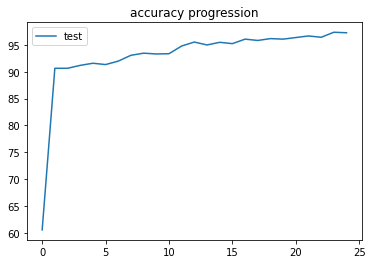

In [41]:
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas 
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
experiment_name = 'test' #settings['experiment_name']
test = 'bandits' #[20:]
n_epochs = 25 #settings['n_epochs']
p2p = P2P_AFPL(patients_left,data_beats_train,data_beats_val,test)
accuracies_bandits_2 = p2p.loop(n_epochs,p2p,experiment_name)

0
full train loss:  tensor(0.8098, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9556, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [33 32  2  3  4  5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
loss after my code:  0.920290048848399
train loss after my code:  0.7803226079092205
48.39822572695909
1
full train loss:  tensor(0.5565, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.6605, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [16 19  6  7  8  9]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.6054590669274518
train loss after my code:  0.5129736389417335
90.63578117299163
2
full train loss:  tensor(0.3779, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4514, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 22 11 12 13 14]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.42649237939326123
train loss after my code:  0.3587880626901291
90.63578117299163
3
full train loss:  tensor(0.2947, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3594, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [23 25 15 17 18 20]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.3382584704322249
train loss after my code:  0.28697721976354196
91.3257762444554
4
full train loss:  tensor(0.2524, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3042, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [31 30 29 28 27 26]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.29871388839390567
train loss after my code:  0.25061870708220313
91.62148841793987
5
full train loss:  tensor(0.2262, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2816, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [10 24 21 33 20  5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.2733069249448455
train loss after my code:  0.2315064811374983
91.42434696895022
6
full train loss:  tensor(0.2119, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2547, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 15 14 19 12 22]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.24871765393131123
train loss after my code:  0.21171254526608588
91.81862986692953
7
full train loss:  tensor(0.1958, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2381, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [17 30  6  7 27 26]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.2278904240742371
train loss after my code:  0.19356501382434507
92.75505174963035
8
full train loss:  tensor(0.1777, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2194, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [10 25 23  0  5 30]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.21131623631038524
train loss after my code:  0.18260341011462738
93.19862000985707
9
full train loss:  tensor(0.1612, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1976, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [20  6  7 14 15 23]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.18213991433716736
train loss after my code:  0.1595265151903771
94.97289305076391
10
full train loss:  tensor(0.1371, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1707, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 20 30  6  7 15]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.15755050797149794
train loss after my code:  0.13766722056456565
95.81074420896994
11
full train loss:  tensor(0.1208, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1458, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [23  0 20 30  6  7]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.13464405101711133
train loss after my code:  0.12387523345187015
96.74716609167078
12
full train loss:  tensor(0.1057, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1246, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [15 23  0 20 30  6]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.11736129259318655
train loss after my code:  0.10576034265399091
96.99359290290784
13
full train loss:  tensor(0.0908, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.1084, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 7 15 23  0 20 30]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.10277012274759881
train loss after my code:  0.09546802642004687
97.33859043863973
14
full train loss:  tensor(0.0819, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0953, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 6  7 15 23  0 20]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.09270419749607742
train loss after my code:  0.0876827948802903
97.48644652538196
15
full train loss:  tensor(0.0788, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0864, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [30  6  7 15 23  0]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.0839731394884837
train loss after my code:  0.08335591021383547
97.53573188762937
16
full train loss:  tensor(0.0719, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0793, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [20 30  6  7 15 23]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.07783038109547534
train loss after my code:  0.07950397648381356
97.6343026121242
17
full train loss:  tensor(0.0685, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0742, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 20 30  6  7 15]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.07300093015592829
train loss after my code:  0.07140587001107285
97.93001478560868
18
full train loss:  tensor(0.0710, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0693, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [23  0 20 30  6  7]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.06855874644899451
train loss after my code:  0.0700127274364734
98.27501232134055
19
full train loss:  tensor(0.0720, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0660, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [15 23  0 20 30  6]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.06513296705700536
train loss after my code:  0.06595155956889034
98.52143913257763
20
full train loss:  tensor(0.0614, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0622, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 7 15 23  0 20 30]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.06124477055805111
train loss after my code:  0.062514609798843
98.71858058156727
21
full train loss:  tensor(0.0591, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0591, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 6  7 15 23  0 20]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.05822941429795709
train loss after my code:  0.06208381701002578
98.7678659438147
22
full train loss:  tensor(0.0564, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0575, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [30  6  7 15 23  0]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.056107384402888885
train loss after my code:  0.0674710982115677
98.8171513060621
23
full train loss:  tensor(0.0560, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0555, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [20 30  6  7 15 23]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.05401494023953963
train loss after my code:  0.05999340080372938
98.91572203055694
24
full train loss:  tensor(0.0645, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0537, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [ 0 20 30  6  7 15]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/mimer/NOBACKUP/groups/snic2022-22-122/arthur/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


loss after my code:  0.05266490430465257
train loss after my code:  0.05916126535182884
98.7678659438147


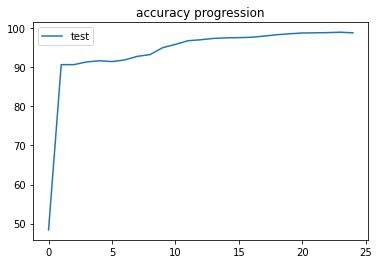

In [32]:
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas 
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
experiment_name = 'test' #settings['experiment_name']
test = 'bandits' #[20:]
n_epochs = 25 #settings['n_epochs']
p2p = P2P_AFPL(patients_left,data_beats_train,data_beats_val,test)
accuracies_bandits = p2p.loop(n_epochs,p2p,experiment_name)

0
full train loss:  tensor(0.8098, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9556, device='cuda:0', dtype=torch.float64)
we are done
31.444061113849187
1
full train loss:  tensor(0.5991, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.7112, device='cuda:0', dtype=torch.float64)
we are done
90.63578117299163
2
full train loss:  tensor(0.4326, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5215, device='cuda:0', dtype=torch.float64)
we are done
90.63578117299163
3
full train loss:  tensor(0.3442, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4181, device='cuda:0', dtype=torch.float64)
we are done
91.3257762444554
4
full train loss:  tensor(0.2899, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3590, device='cuda:0', dtype=torch.float64)
we are done
91.62148841793987
5
full train loss:  tensor(0.2575, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3209, device='cuda:0', dtype=torch.float64)
we are done
91.4243469

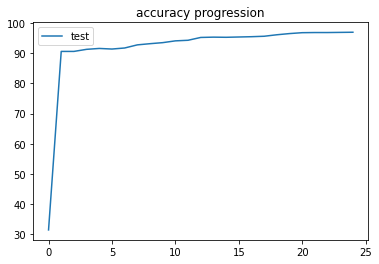

In [33]:
import collections
from time import time
import random
from sklearn.metrics import f1_score, confusion_matrix
import pandas 
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
experiment_name = 'test' #settings['experiment_name']
test = 'local' #[20:]
n_epochs = 25 #settings['n_epochs']
p2p = P2P_AFPL(patients_left,data_beats_train,data_beats_val,test)
accuracies_local = p2p.loop(n_epochs,p2p,experiment_name)

96.99359290290784
98.91572203055694


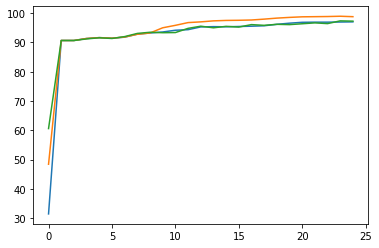

In [43]:
plt.plot(accuracies_local)
plt.plot(accuracies_bandits)
plt.plot(accuracies_bandits_2)
print(np.max(accuracies_local))
print(np.max(accuracies_bandits))

In [171]:
patients_healthy = []
patients_really_unhealthy = [] 
patients_semi_unhealthy = []
for i in range(len(patients_left)): 
    
    mit_bih = MIT_BIH([patients_left[i]],data_beats_train)
    #print('train ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_train = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    mit_bih = MIT_BIH([patients_left[i]],data_beats_test)
    #print('test ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_test = torch.sum(mit_bih.y).numpy()/len(mit_bih.y) 
    if fraction_train + fraction_test == 0: 
        patients_healthy.append(i)
    else: 
        V = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='V')
        S = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='S')
        F = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='F')
        print('patient ',i)
        print('V: ',V)
        print('S: ',S)
        print('F: ',F)
        if V+S+F >= 10: 
            patients_really_unhealthy.append(i)
        else: 
            patients_semi_unhealthy.append(i)
print('healthy patients: ',patients_healthy)
print('very unhealthy patients: ',patients_really_unhealthy)

patient  0
V:  0
S:  3
F:  0
patient  3
V:  48
S:  0
F:  0
patient  4
V:  4
S:  0
F:  0
patient  5
V:  4
S:  0
F:  0
patient  8
V:  0
S:  1
F:  0
patient  10
V:  9
S:  0
F:  0
patient  12
V:  2
S:  9
F:  0
patient  13
V:  72
S:  0
F:  0
patient  17
V:  7
S:  22
F:  1
patient  18
V:  100
S:  1
F:  0
patient  19
V:  63
S:  0
F:  0
patient  20
V:  1
S:  0
F:  0
patient  21
V:  129
S:  0
F:  56
patient  22
V:  23
S:  1
F:  0
patient  24
V:  37
S:  0
F:  0
patient  25
V:  23
S:  1
F:  0
patient  26
V:  7
S:  0
F:  0
patient  27
V:  0
S:  0
F:  0
patient  28
V:  65
S:  0
F:  0
patient  29
V:  50
S:  0
F:  0
patient  31
V:  2
S:  1
F:  0
patient  32
V:  0
S:  172
F:  0
patient  33
V:  108
S:  3
F:  3
healthy patients:  [1, 2, 6, 7, 9, 11, 14, 15, 16, 23, 30]
very unhealthy patients:  [3, 12, 13, 17, 18, 19, 21, 22, 24, 25, 28, 29, 32, 33]


In [175]:
print(p2p.phis[17,:])
print(np.argmax(p2p.phis[17,:]))
print(p2p.phis[21,:])
print(np.argmax(p2p.phis[21,:]))
print(p2p.phis[29,:])
print(np.argmax(p2p.phis[29,:]))
print(p2p.phis[32,:])
print(np.argmax(p2p.phis[32,:]))
print(p2p.phis[33,:])
print(np.argmax(p2p.phis[33,:]))

[ 5.  2.  1.  1.  1. 54.  1.  1.  2.  2.  6.  2.  9.  4.  2.  2.  2.  0.
 16. 25.  2.  1. 17.  1. 10.  3.  2.  1.  1.  1.  1.  0.  0. 14.]
5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
10
[ 2.  2.  1.  6.  1.  5.  1.  1.  2.  2.  1.  2.  3.  6.  1.  2.  2.  3.
  2.  4.  1.  4.  3.  1.  5.  4.  6.  3. 11.  0.  1.  0.  0.  3.]
28
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
19


In [173]:
#print(p2p.phis[patients_healthy])
all_patients = np.arange(len(patients_left))
unhealthy_patients = [x for x in all_patients if x not in patients_healthy]
#print(unhealthy_patients)
blub = p2p.phis[patients_healthy,:]
blub2 = p2p.phis[patients_really_unhealthy,:]
#print(np.shape(blub))
#print(blub[:,patients_healthy])
#print(p2p.phis[0])

score = 0 
score2 = 0 
score_a = 0 
score_b = 0 
for row in range(len(patients_left)): # check if the healthy patients mainly collaborate with other healthy patients
    if row in patients_healthy: 
        score += np.sum(blub[:,row])
        score_b += np.sum(blub2[:,row])
    else: 
        score2 += np.sum(blub[:,row])
        score_a += np.sum(blub2[:,row])
        
unhealthy_patients = len(patients_left) - len(patients_healthy) 
print(score / len(patients_healthy))
print(score2 / len(patients_really_unhealthy))
print(score_b / len(patients_healthy))
print(score_a / len(patients_really_unhealthy))

554.3636363636364
31.571428571428573
9.636363636363637
60.42857142857143
6098.0
442.0
106.0
846.0


In [ ]:
import collections
from time import time
import random
seed = settings['seed']
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
test = 'local' #settings['type']
p2p = P2P_AFPL(total_clients,train_data,train_partition,test_data,test_partition,test)
phis = p2p.loop(10,p2p,settings['experiment_name'])

In [26]:
# Combinatorial UCB 
import math 

class combinatorial_UCB(object):
    def __init__(self,n_clients,algorithm='UCB1_tuned'):
        self.n_clients = n_clients 
        
        # define variables for storage 
        # which clients we select 
        self.times_selected = np.zeros((n_clients,n_clients)) # to record how often each client got selected 
        self.reward_per_client = np.zeros((n_clients,n_clients)) # to record what reward we collected per client 
        self.reward2_per_client = np.zeros((n_clients,n_clients)) # to record the squared reward per client (needed for UCB1-tuned)
        # how many clients we select 
        self.n_clients_selected_arr = []
        self.reward3_per_client = np.zeros((n_clients,n_clients-1))
        self.times_selected2 = np.zeros((n_clients,n_clients-1))
        
        self.algorithm = algorithm
        
    def UCB(self,this_client,n): 
        #for this_client in range(self.n_clients):
        other_clients = [x for x in range(self.n_clients) if x != this_client[0]]

        upper_bound = np.zeros(self.n_clients)
        for i,other_client in enumerate(other_clients):
            if self.times_selected[this_client,other_client]==0: # make first iteration value high
                upper_bound[other_client] = 1e500 
            else: 
                # We first calculate the average reward gained for this client 
                average_reward = self.reward_per_client[this_client,other_client] / self.times_selected[this_client,other_client]

                # Then we compute the confidence interval [avg_reward - delta, avg_reward + delta]
                if self.algorithm == 'UCB1':
                    delta = math.sqrt( 2 * math.log(n) / self.times_selected[this_client,other_client])

                if self.algorithm == 'UCB1_tuned':
                    variance_bound = self.reward2_per_client[this_client,other_client] / self.times_selected[this_client,other_client] - average_reward**2
                    variance_bound += math.sqrt(2 * math.log(n)/self.times_selected[this_client,other_client])

                    factor = np.min([variance_bound, 1/4])
                    delta = math.sqrt( factor * math.log(n) / self.times_selected[this_client,other_client] )

                # upper bound 
                upper_bound[other_client] = average_reward + delta 

        if self.algorithm == 'random': 
            upper_bound = np.random.rand(self.n_clients)

        # select the client with the highest upper bound 
        sorted_upper_bound = np.flip(np.argsort(upper_bound))
        
        #n_clients_selected_arr.append(n_clients_selected)
        selected_clients = sorted_upper_bound[:int(n+1)]

        self.times_selected[this_client,selected_clients] += 1 
        return selected_clients 
    
    def collect_reward(self,this_client,selected_clients,observations): 
        # collect the reward 
        reward = observations[selected_clients]#df.iloc[n,selected_client]
        self.reward_per_client[this_client,selected_clients] += reward 
        self.reward2_per_client[this_client,selected_clients] += reward**2

        # reward for numbers of clients selected 
        n_clients_selected = len(selected_clients)-1
        self.times_selected2[this_client,n_clients_selected] += 1 
        reward2 = np.abs(n_clients_selected - np.sum(observations))
        self.reward3_per_client[this_client,n_clients_selected] += 1 - reward2 / self.n_clients

            
    def to_client(self,this_client,n):
        self.selected_clients = self.UCB(this_client,n)
        return self.selected_clients
        
    def to_server(self,this_client,observation): 
        self.collect_reward(this_client,self.selected_clients,observation)

### Old code 

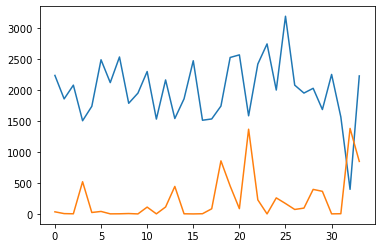

In [11]:
plt.plot(array)

[100, 101, 103, 106, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 203, 205, 208, 210, 212, 214, 215, 219, 220, 221, 228, 230, 231, 232, 233]
[1742.  857.]


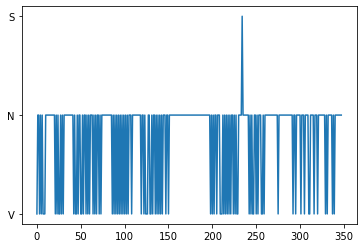

In [12]:
print(patients_left)
print(array[18])
patient = [200]
plt.plot(data_beats_train[patient[0]]['class'])

In [26]:
# local model 
for ii in patients_left: 
    print('patient: ',ii)
    patients_train = [ii]
    mit_bih = MIT_BIH(patients_train,data_beats_train)
    dataloader = DataLoader(mit_bih,batch_size=32,shuffle=True,num_workers=0)
    model = get_base_model(1)
    model.double().train()
    #crit = nn.CrossEntropyLoss()
    optimizer= torch.optim.Adam(model.parameters())
    for i in range(20):
        losses = 0 
        for batch_idx, (data, target) in enumerate(dataloader):
            data = data.double().unsqueeze(1)
            target=target.long()

            optimizer.zero_grad()
            output = model(data)
            output = F.log_softmax(output,dim=-1)
            loss = F.nll_loss(output,target)
            loss.backward()
            optimizer.step()
            losses += loss.detach().cpu().numpy()

    # calculate accuracy on test set 
    from sklearn.metrics import f1_score, confusion_matrix
    import pandas 

    mit_bih = MIT_BIH(patients_train,data_beats_test)
    dataloader_test = DataLoader(mit_bih,batch_size=32,shuffle=False,num_workers=0)
    model.double().eval()


    losses = 0 
    len_total = 0 
    accuracy = 0 
    y_true = []
    y_pred = []
    for batch_idx, (data, target) in enumerate(dataloader_test):
        data = data.double().unsqueeze(1)
        target=target.long()
        output = model(data)
        output = F.log_softmax(output,dim=-1)
        loss = F.nll_loss(output,target)
        losses += loss.detach().cpu().numpy()

        output1 = np.argmax(output.detach().cpu().numpy(),axis=1)
        target1 = target.detach().cpu().numpy()
        accuracy += sum(output1 == target1)
        len_total += len(target)
        y_pred.append(list(output1))
        y_true.append(list(target1))

    #print(losses)
    print('test accuracy is: ',accuracy/len_total*100,'%')
    #print(len_total)
    pred = np.array([j for sub in y_pred for j in sub])
    true = np.array([j for sub in y_true for j in sub])
    #print(f1_score(true,pred))
    if accuracy/len_total*100 != 100: 
        tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
        df = pandas.DataFrame([[tp,fp],[fn,tn]],columns=['Positive','Negative'],index=['Predicted Positive','Predicted Negative'])
        print(df)

patient:  100
test accuracy is:  97.33333333333334 %
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         2        73
patient:  101
test accuracy is:  100.0 %
patient:  103
test accuracy is:  100.0 %
patient:  106
test accuracy is:  100.0 %
patient:  108
test accuracy is:  100.0 %
patient:  109
test accuracy is:  98.80952380952381 %
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         1        83
patient:  111
test accuracy is:  100.0 %
patient:  112
test accuracy is:  100.0 %
patient:  113
test accuracy is:  100.0 %
patient:  115
test accuracy is:  100.0 %
patient:  116
test accuracy is:  95.0 %
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         4        76
patient:  117
test accuracy is:  100.0 %
patient:  118
test accuracy is:  93.42105263157895 %
                    Positive  Negative
Predicted Positive         0         0
Pre

In [27]:
# Global model 
patients_train = patients_left
mit_bih = MIT_BIH(patients_train,data_beats_train)
dataloader = DataLoader(mit_bih,batch_size=32,shuffle=True,num_workers=0)
model = get_base_model(1)
model.double().train()
#crit = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters())
for i in range(20):
    losses = 0 
    for batch_idx, (data, target) in enumerate(dataloader):
        data = data.double().unsqueeze(1)
        target=target.long()

        optimizer.zero_grad()
        output = model(data)
        output = F.log_softmax(output,dim=-1)
        loss = F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        losses += loss.detach().cpu().numpy()

# calculate accuracy on test set 
from sklearn.metrics import f1_score, confusion_matrix
import pandas 

mit_bih = MIT_BIH(patients_train,data_beats_test)
dataloader_test = DataLoader(mit_bih,batch_size=32,shuffle=False,num_workers=0)
model.double().eval()


losses = 0 
len_total = 0 
accuracy = 0 
y_true = []
y_pred = []
for batch_idx, (data, target) in enumerate(dataloader_test):
    data = data.double().unsqueeze(1)
    target=target.long()
    output = model(data)
    output = F.log_softmax(output,dim=-1)
    loss = F.nll_loss(output,target)
    losses += loss.detach().cpu().numpy()

    output1 = np.argmax(output.detach().cpu().numpy(),axis=1)
    target1 = target.detach().cpu().numpy()
    accuracy += sum(output1 == target1)
    len_total += len(target)
    y_pred.append(list(output1))
    y_true.append(list(target1))

#print(losses)
print('test accuracy is: ',accuracy/len_total*100,'%')
#print(len_total)
pred = np.array([j for sub in y_pred for j in sub])
true = np.array([j for sub in y_true for j in sub])
#print(f1_score(true,pred))
if accuracy/len_total*100 != 100: 
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    df = pandas.DataFrame([[tp,fp],[fn,tn]],columns=['Positive','Negative'],index=['Predicted Positive','Predicted Negative'])
    print(df)

test accuracy is:  98.77324891175306 %
                    Positive  Negative
Predicted Positive       261        25
Predicted Negative         6      2235


In [35]:
balanced_accuracy = 0.5*(tp/(tp+fn))+ 0.5*(tn/(tn+fp))
print(balanced_accuracy)

0.9832330714924928


In [185]:
mit_bih = MIT_BIH([203],data_beats_test)
dataloader_test = DataLoader(mit_bih,batch_size=32,shuffle=False,num_workers=0)
print(len(dataloader))
print(len(dataloader_test))
model.double().eval()


losses = 0 
len_total = 0 
accuracy = 0 
y_true = []
y_pred = []
for batch_idx, (data, target) in enumerate(dataloader_test):
    data = data.double().unsqueeze(1)
    target=target.long()
    output = model(data)
    output = F.log_softmax(output,dim=-1)
    loss = F.nll_loss(output,target)
    losses += loss.detach().cpu().numpy()
    
    output1 = np.argmax(output.detach().cpu().numpy(),axis=1)
    target1 = target.detach().cpu().numpy()
    accuracy += sum(output1 == target1)
    len_total += len(target)
    y_pred.append(list(output1))
    y_true.append(list(target1))

print(losses)
print('test accuracy is: ',accuracy/len_total*100,'%')
print(len_total)


pred = np.array([j for sub in y_pred for j in sub])
true = np.array([j for sub in y_true for j in sub])
print(f1_score(true,pred))
tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
print(fp/(fp+tn))
print(fn/(fn+tp))
print(tn)
print(fn)
print(tp)
print(fp)
df = pandas.DataFrame([[tp,fp],[fn,tn]],columns=['Positive','Negative'],index=['Predicted Positive','Predicted Negative'])
print(df)

75
19
2.244113776413135
test accuracy is:  96.80672268907563 %
595
0.8875739644970413
0.009881422924901186
0.15730337078651685
501
14
75
5
                    Positive  Negative
Predicted Positive        75         5
Predicted Negative        14       501


In [32]:
class P2P_AFPL():
    def __init__(self,patients_left,total_clients,train_data,test_data): 
        self.selected_clients = patients_left
        self.network = get_base_model(1)
        
        self.total_clients = len(self.selected_clients)  
        self.patients_left = patients_left
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.dataloaders_test = {}
        for idx,i in enumerate(self.patients_left):
            self.client_models[str(i)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(i)] = torch.optim.SGD(self.client_models[str(i)].parameters(),lr=0.01,momentum=0.5)
            dataset_train=  MIT_BIH([self.patients_left[idx]],train_data)
            self.len[str(i)] = len(dataset_train)
            self.dataloaders[str(i)] = DataLoader(dataset_train,batch_size=32,shuffle=True,num_workers=0)
            
            dataset_test= MIT_BIH([self.patients_left[idx]],test_data)
            self.len_test[str(i)] = len(dataset_test)
            self.dataloaders_test[str(i)] = DataLoader(dataset_test,batch_size=32,shuffle=False)
        self.dataset_train = dataset_train 
        
    def update_local_models(self,selected_clients):
        self.dw = {}
        loss_test = 0 
        loss_test2 = 0 
        losses = 0 
        losses2 = 0 
        loss_test3 = 0 
        losses3 = 0 
        
        for idx,i in enumerate(selected_clients): 
            optimizer= torch.optim.Adam(self.client_models[str(i)].parameters())
            self.client_models[str(i)].train()
            losses22 = 0 
            dataloader = self.dataloaders[str(i)]
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.double().unsqueeze(1).cuda()
                target=target.long().cuda()

                optimizer.zero_grad()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)
                loss = F.nll_loss(output,target)
                loss.backward()
                optimizer.step()
                losses22 += loss.detach().cpu().numpy()
            print(i)
            print(losses22)
            losses2 += losses22/self.len[str(i)]

        return losses2 
            
    def combine_models(self,i,client_numbers):
        zero_copy = copy.deepcopy(self.client_models[str(i)]) # This is used to collect the model in
        j =0
        client_numbers_plus_client = np.concatenate((client_numbers,np.array([int(i)])))# This is more efficient
      #  alphas = zero_copy.alphas.detach()
       # alphas[i] = 1 - torch.sum(
       #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda()/(len(client_numbers_plus_client))
        #print(alphas)
        for ii in client_numbers_plus_client:
          #  print(ii)
            for (name, param),(name2,param2) in zip(zero_copy.named_parameters(),self.client_models[str(ii)].named_parameters()): #self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j]*param2.data # we add all participating client's models to the one here.

            j += 1

        self.client_models[str(i)] = zero_copy.double()
        
    def calc_accuracy(self):
        
        for i in self.selected_clients: 
            dataloader = self.dataloaders_test[str(i)]
            intermediate_accuracy = 0 
            self.client_models[str(i)].eval()
            y_pred = []
            y_true = []
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array,axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
                y_pred.append(list(output_class))
                y_true.append(list(target_array))

            accuracy = intermediate_accuracy/p2p.len_test[str(i)]*100
            print(i)
            
            
            pred = np.array([j for sub in y_pred for j in sub])
            true = np.array([j for sub in y_true for j in sub])
            C = confusion_matrix(true,pred).ravel()
            if len(C) == 4: 
                df = pandas.DataFrame([[C[3],C[1]],[C[2],C[0]]],columns=['Positive','Negative'],index=['Predicted Positive','Predicted Negative'])
                print(df)
                balanced_accuracy = 0.5*(C[3]/(C[3]+C[2]))+0.5*(C[0]/(C[0]+C[1]))*100
                print('balanced accuracy: ',balanced_accuracy)
            else: 
                print('C: ',C)
                print(accuracy)
            
    def federated_averaging(self):
        self.shared_model = copy.deepcopy(network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)
        #print("weights ",weight)
        for idx,i in enumerate(self.selected_clients): 
            for (name, param),(name2,param2) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models[str(i)].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data 

        self.shared_model = self.shared_model.double()
        
        
    def fed_avg_new(self,selected_clients):
        fnull = np.zeros(len(selected_clients))
        fafter = np.zeros(len(selected_clients))
        loss_test = 0 
        losses = 0 
        loss_test2 = 0 
        losses2 = 0 
        
        for i in selected_clients: 
            before = time()
            selected_clients = [0,1,2,3,4,5,6,7,8,9,10,11]
            client = i

            selected_clients.remove(client)
            calc_shap2 = calculate_SHAP(np.array(selected_clients),self.dataset_train,200)
            shared_model,selected_clients2,fnullf,fafterf = calc_shap2.forward2(client,self.client_models,self.dataloaders_test,self.len_test)
            if len(selected_clients2)> 0: 
                self.combine_models(i,selected_clients2)
            self.phis[i,selected_clients2] +=1 
            fnull[i] =fnullf 
            fafter[i] = fafterf
            after = time() - before 
            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0 
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test += F.nll_loss(output,target)
            losses += loss_test /self.len_test[str(i)]
            
            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders[str(i)]
            loss_test2 = 0 
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test2 += F.nll_loss(output,target)
            losses2 += loss_test2 /self.len[str(i)]
        
        print('full losses train: ',losses2)
        print('full losses: ', losses)
        return losses, losses2 
        
        #plt.plot(fnull,'o')
        #plt.plot(fafter,'o')
    
    def loop(self,epochs,p2p,mode='disjoint'):
        
        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))

        
        for i in range(epochs): 
            print(i)
            list1 = []
     
            loss_train = self.update_local_models(self.selected_clients)
            #loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train)
            print(loss_train)
            self.calc_accuracy()
            
            #loss_test, loss_train = self.fed_avg_new(self.selected_clients)
            #loss_tests2.append(loss_test.detach().cpu().numpy())
           # loss_trains2.append(loss_train.detach().cpu().numpy())
            #self.calc_accuracy()
            #print(self.phis)
        
        #plt.plot(loss_trains)
        #plt.plot(loss_tests)
        #plt.plot(loss_trains2)
        #plt.plot(loss_tests2)
    

In [33]:
import collections
from time import time
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
p2p = P2P_AFPL(patients_left[20:],10,data_beats_train,data_beats_test)
alphas = p2p.loop(10,p2p)

0
205
9.204081860941997
208
9.164893682289101
210
9.024736630063142
212
9.223219142022176
214
7.660368267408623
215
10.87661437366542
219
7.101496707389882
220
7.173974313569808
221
8.202623574677922
228
6.889156668700792
230
7.9024812775706605
231
5.718286187255357
232
5.009234152934267
233
9.31998772482031
0.34794730273274427
205
C:  [88]
100.0
208
                    Positive  Negative
Predicted Positive         7         0
Predicted Negative        42        49
balanced accuracy:  50.07142857142857
210
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         4        84
balanced accuracy:  50.0
212
C:  [91]
100.0
214
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         8        67
balanced accuracy:  50.0
215
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         9       103
balanced accuracy:  50.0
219
                    Positive  N

/tmp/ipykernel_1450847/4083253139.py:111: RuntimeWarning: invalid value encountered in long_scalars
  balanced_accuracy = 0.5*(C[3]/(C[3]+C[2]))+0.5*(C[0]/(C[0]+C[1]))*100
/tmp/ipykernel_1450847/4083253139.py:111: RuntimeWarning: invalid value encountered in long_scalars
  balanced_accuracy = 0.5*(C[3]/(C[3]+C[2]))+0.5*(C[0]/(C[0]+C[1]))*100


212
5.188616438396855
214
5.690885356646198
215
5.65415467038693
219
5.164377562579372
220
5.057020625617249
221
6.203014943859415
228
5.488799988113783
230
5.180552467827871
231
4.601928145219141
232
4.741440792253887
233
7.934391645979618
0.2525882526980533
205
C:  [88]
100.0
208
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative        49        49
balanced accuracy:  50.0
210
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         4        84
balanced accuracy:  50.0
212
C:  [91]
100.0
214
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         8        67
balanced accuracy:  50.0
215
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         9       103
balanced accuracy:  50.0
219
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         1        

231
C:  [52]
100.0
232
                    Positive  Negative
Predicted Positive        46        13
Predicted Negative         0         0
balanced accuracy:  0.5
233
                    Positive  Negative
Predicted Positive        19         0
Predicted Negative         8        75
balanced accuracy:  50.351851851851855
6
205
0.24187191243308648
208
5.4381271146627235
210
3.2214515256150538
212
0.04743052297807073
214
3.5958098131067384
215
3.1273493483486274
219
1.7146821759130673
220
0.31481591479104226
221
4.316755497352721
228
4.006393814247025
230
0.1209426184514281
231
0.7494311273258609
232
3.599833310068658
233
4.852287430253483
0.10850397073971274
205
C:  [88]
100.0
208
                    Positive  Negative
Predicted Positive        44         0
Predicted Negative         5        49
balanced accuracy:  50.44897959183673
210
                    Positive  Negative
Predicted Positive         0         0
Predicted Negative         4        84
balanced accuracy:  50.0
212
C:  [

In [118]:
from sklearn.linear_model import LinearRegression
class calculate_SHAP(SHAP_kernel):
    def __init__(self,selected_clients,dataset,samples):
        #
        self.n_clients = len(selected_clients)
        self.samples = sample
        self.dataset = dataset
        self.selected_clients = selected_clients
        #print('p2p',self.p2p)
        #self.define_shap()
        
    def define_shap(self):
        # define Shap kernel
        shap_kernel = SHAP_kernel(len(self.selected_clients),200,verbose=False)
        #super().__init__()
        adjusted,weights = shap_kernel.forward_shap()
        coalition_object = create_coalitions(adjusted,weights,self.n_clients)
        self.masks, self.weights = coalition_object.forward()
        
        self.masks = np.asarray(self.masks,dtype='bool')
        
    def combine_models(self,network,client_models,coalitions):
        shared_model = copy.deepcopy(network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [p2p.len[str(int(x))] for x in coalitions]
        weight = weight / np.sum(weight) #weight is wrong 
        #print("weights ",weight)
        for idx,i in enumerate(coalitions): 
            for (name, param),(name2,param2) in zip(shared_model.named_parameters()
                                                      ,client_models[str(int(i))].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data 
        shared_model = shared_model.double()
        return shared_model
    
    def calc_fnull(self,client,network,client_models,dataloaders_test,len_test): 
        # we calculate the prediction of the model of client ...  
        shared_model = self.combine_models(network,client_models,np.array([client]))
        shared_model.eval().cuda()
        fnull = np.zeros((len_test[str(client)],1))
        for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
            data = data.double().cuda()
            target = target.long().cuda()
            fnull[batch_idx*16:batch_idx*16+len(target)] = np.reshape(F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy(),(len(target),1))
        return fnull
        
    def calc_fx(self,client,network,client_models,dataloaders_test,len_test):
        selected_clients = np.concatenate((self.selected_clients,np.array([client])))
        shared_model = self.combine_models(network,client_models,selected_clients)
        shared_model.eval().cuda()
        #fx = np.zeros((len(p2p.dataloaders_test[str(10)]),1))
        fx = np.zeros((len_test[str(client)],1))
        for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
            data = data.double().cuda()
            target = target.long().cuda()
            fx[batch_idx*16:batch_idx*16 + len(target)] = np.reshape(F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy(),(len(target),1))
        #print(fx)
        return fx
    
    def first_check(self,mean_fnull,client,network,client_models,dataloaders_test,len_test):
        ey = np.zeros((len(self.masks),len_test[str(client)])) # fix indices 
        selected_clients = []
        #print(mean_fnull)
        
        for i,coalition in enumerate(self.masks[:len(self.selected_clients),:]): 
            selected_clients_coalition = np.concatenate((self.selected_clients[coalition],np.array([client])))
            shared_model = self.combine_models(network,client_models,selected_clients_coalition)
           # print(selected_clients_coalition)
            shared_model.eval().cuda()
            for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                ey[i,batch_idx*16:batch_idx*16+len(target)] = F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy()
           # print(np.mean(ey[i,:]))
            # check if ey is better or worse than fnull: 
            if i == len(self.selected_clients)-1: 
               # print('scores after adding model',np.mean(ey[:i,:],axis=1))
                #print(np.where(np.mean(ey[:i,:],axis=1)<=mean_fnull))
                #print(np.mean(ey[:i,:],axis=1)<=mean_fnull+0*mean_fnull)
                selected_clients_index = np.where(np.mean(ey[:i,:],axis=1)<=mean_fnull+0*mean_fnull )
               # print("selected clients: ",self.selected_clients[selected_clients_index])
                selected_clients = self.selected_clients[selected_clients_index]
        if len(selected_clients) != len(self.selected_clients) and len(selected_clients) > 1:
            self.__init__(selected_clients,self.dataset,self.samples)
            ey2 = np.zeros((len(self.masks),len_test[str(client)]))
            ey2[:len(self.selected_clients),:] = ey[selected_clients_index,:]
            ey = ey2 
        return ey, selected_clients 
    
    def solve(self,fnull,ey):
        # Transform to k-dimensional least squares problem 
        k = len(fnull)
        coalitions = len(self.masks)
        M = len(self.selected_clients)
        eyAdjb = []
        for kk in range(k): 
            #eyAdjb[kk*c:(kk+1)*199]
            eyAdjb.append(list(ey[:,kk] -fnull[kk]))

        eyAdjb = sum(eyAdjb,[])
        etmp = self.masks
        X = np.tile(etmp, (k,1))
        y = np.array(eyAdjb)
        w = np.tile(self.weights, k)
        reg = LinearRegression(fit_intercept=False).fit(X,y,sample_weight=w)
        return reg.coef_

    
    def forward2(self,client,client_models,dataloaders_test,len_test,evaluation="loss"):
        # calculate fnull, prediction without knowledge (empty initialized model)
        self.define_shap()
       # print(self.selected_clients)
       # print(self.masks[:len(self.selected_clients),:])
        fnull = self.calc_fnull(client,network,client_models,dataloaders_test,len_test)
        mean_fnull = np.mean(fnull)
      #  print("score without collaboration: ",mean_fnull)

        # first check if ey is better or worse than fnull: 
        ey, selected_clients = self.first_check(mean_fnull,client,network,client_models,dataloaders_test,len_test)
        if len(selected_clients) > 100: 

            # calculate ey, output for all coalitions 
            for i,coalition in enumerate(self.masks[len(self.selected_clients):,:]): 
                selected_clients_coalition = np.concatenate((self.selected_clients[coalition],np.array([client])))
                shared_model = self.combine_models(network,client_models,selected_clients_coalition)
                shared_model.eval().cuda()
                for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
                    data = data.double().cuda()
                    target = target.long().cuda()
                    ey[i+len(self.selected_clients),batch_idx*16:batch_idx*16+len(target)] = F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy()

            # calculate fx 
            #fx = self.calc_fx(client)

            #masks = np.asarray(self.masks,dtype = 'int')
            #,masks,len(self.selected_clients),fx,0,self.weights)
           # mean = np.mean(ey,axis=1)
           # print(np.mean(mean))
           # print(fnullf)
            #print(mean-mean_fnull<0)
          #  self.weights = self.weights[mean-mean_fnull<0]
           # self.masks = self.masks[mean-mean_fnull<0,:]
           # if sum(mean-mean_fnull<0) > 1: 
                #phi = self.solve(fnull,ey[mean-mean_fnull<0,:]) 
            #phi = self.solve(fnull,ey) 
            selected_clients_index = np.argmin(phi) #np.where(phi<0)
            #selected_clients_index = self.masks[np.argmin(mean-fnullf),:]
            #phi = np.zeros(self.selected_clients)

            #self.ey2 = ey[mean-mean_fnull<0,:] 
            self.ey = ey 
            selected_clients = selected_clients[selected_clients_index]

            selected_clients = np.concatenate((np.array([selected_clients]),np.array([client])))
            #else: 
              #  phi = np.zeros(self.selected_clients)
             #   print('no one selected')
               # selected_clients = np.array([client])
            
            
            #print(phi)
           # print(selected_clients)
            # check score: 
            shared_model = self.combine_models(network,client_models,selected_clients)
            shared_model.eval()
            f_after = np.zeros(len_test[str(client)])
            for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
                    data = data.double().cuda()
                    target = target.long().cuda()
                    f_after[batch_idx*16:batch_idx*16+len(target)] = F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy()
        #    print("score after: ",np.mean(f_after))
            self.ey = ey 
            self.fnull = fnull 
            return phi, selected_clients,mean_fnull,np.mean(f_after)
        else: 
         #   print("no clients selected")
            shared_model = self.combine_models(network,client_models,np.concatenate((selected_clients,np.array([client]))))
            shared_model.eval()
            f_after = np.zeros(len_test[str(client)])
            for batch_idx, (data, target) in enumerate(dataloaders_test[str(client)]):
                    data = data.double().cuda()
                    target = target.long().cuda()
                    f_after[batch_idx*16:batch_idx*16+len(target)] = F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy()
       #     print("score after: ",np.mean(f_after))
            return shared_model, selected_clients,mean_fnull,np.mean(f_after)
        #print(phi)
        #return ey, fnull, fx , masks, self.weight


In [ ]:
from time import time 
selected_clients = [0,1,2,3,4,5,6,7,8,9,10,11]

print(selected_clients)
fnull = np.zeros(len([0,1,2,3,4,5,6,7,8,9,10,11]))
fafter = np.zeros(len([0,1,2,3,4,5,6,7,8,9,10,11]))

for i in selected_clients: 
    before = time()
    selected_clients = [0,1,2,3,4,5,6,7,8,9,10,11]
    client = i
    print(client)
    selected_clients.remove(client)
    calc_shap2 = calculate_SHAP(np.array(selected_clients),dataset_train,200,p2p)
    shared_model,selected_clients2,fnullf,fafterf = calc_shap2.forward2(client)
    fnull[i] =fnullf 
    fafter[i] = fafterf
    after = time() - before 
    print('duration = ',after,'seconds')
    print(selected_clients2)
    #if len(selected_clients2) > 1: 
    #    plt.plot(selected_clients2,phi)
    #    plt.plot(selected_clients2[np.where(phi<0)[0]],phi[phi<0],'or')

In [ ]:
plt.plot(fnull,'o')
plt.plot(fafter,'o')
print(np.sum(fnull))
print(np.sum(fafter))

In [ ]:
plt.plot(fnull)
plt.plot(fafter)
print(np.sum(fnull))
print(np.sum(fafter))

In [ ]:
plt.plot(fnull)
plt.plot(fafter)
print(np.sum(fnull))
print(np.sum(fafter))

In [ ]:
plt.plot(fnull)
plt.plot(fafter)
print(np.sum(fnull))
print(np.sum(fafter))

In [ ]:
plt.plot(fnull)
plt.plot(fafter)
print(np.sum(fnull))
print(np.sum(fafter))

In [ ]:
plt.plot(selected_clients2,phi)
plt.plot(selected_clients2[np.where(phi<0-fnullf)[0]],phi[phi<0-fnullf],'or')

In [ ]:
print(np.shape(calc_shap2.ey))
mean = np.mean(calc_shap2.ey,axis=1)
print(np.mean(mean))
print(fnullf)
print(mean-fnullf<0)
print(np.argmin(mean-fnullf))


In [ ]:
plt.plot(phi_raw2)

In [ ]:
print(np.sum(fnull))
print(len(fnull))
print(np.shape(ey))
print(np.sum(ey[:10,:],axis=1))

In [ ]:
shared_model = calc_shap2.combine_models(p2p,[0])
shared_model.eval().cuda()
ey2 = np.zeros(384)
for batch_idx, (data, target) in enumerate(p2p.dataloaders_test[str(10)]):
    data = data.double().cuda()
    target = target.long().cuda()

    ey2[batch_idx*16:batch_idx*16+len(target)] = F.nll_loss(shared_model(data),target,reduction='none').detach().cpu().numpy()
print(np.sum(ey2))

#### old code 

In [ ]:
from sklearn.linear_model import LinearRegression
X = etmp 
y = eyAdj2
w = calc_shap2.weights
print(np.shape(X))
print(np.shape(y))
print(np.shape(w))

reg  = LinearRegression().fit(X,y,sample_weight=w)
phi_raw = reg.coef_ 
phi = np.zeros(M)
phi[nonzero_inds[:-1]] = phi_raw
phi[nonzero_inds[-1]] = ((fx_array[dim]) - (fnull_array[dim])) - sum(phi_raw)
#print(reg.coef_)
print(phi)
print(phis_single2[dim,:])
phi3 = calc_shap2.solve(np.reshape(ey[dim],(199,1)),np.reshape(fnull_array[dim],(1,1))
                        ,maskMatrix,10,np.reshape(fx_array[dim],(1,1)),dim,w)
print(phi3)
#plt.plot(X[:,0],y,".")
tmp = np.transpose(np.transpose(etmp) * np.transpose(w))
#print("tmp ",np.shape(tmp))
etmp_dot = np.dot(np.transpose(tmp), etmp)

tmp2 = np.linalg.inv(etmp_dot)
phi4 = np.dot(tmp2, np.dot(np.transpose(tmp), eyAdj2))
print(phi4)
plt.plot(phi)
plt.plot(phi4)
    

In [ ]:
# instead of normalizing, just count how often participating with this client would bring the loss down. 
phi_count = np.zeros((348,10))
#epsilon = -0.0001
phi_benefit = np.zeros((348,10))
phi_loss = np.zeros((348,10))

for i in range(348): 
    negative_indices = phi_gt_single[i,:] < 0 + epsilon
    positive_indices = phi_gt_single[i,:] >= 0 + epsilon  
    
    phi_count[i,negative_indices] = 1 
    phi_benefit[i,negative_indices] = -fnull[i]#phi_gt_single[i,negative_indices]
    phi_loss[i,positive_indices] = fnull[i]#phi_gt_single[i,positive_indices]
print(np.sum(phi_count,axis=0))

In [ ]:
initial_model = calc_shap2.combine_models(p2p,np.array([10]))

shared_model = calc_shap2.combine_models(p2p,np.array([0,1,2,3,4,5,6,7,8,9,10]))
shared_model2 = calc_shap.combine_models(p2p,np.array([0,1,2,3,7,10]))
shared_model3 = calc_shap.combine_models(p2p,np.array([1,2,3,10]))
#shared_model3 = calc_shap2.combine_models(p2p,np.array([0,1,2,3,4,6,7,8,9,10]))
shared_model.eval()
shared_model2.eval()
shared_model3.eval()

f_null = 0 
f_opt = 0 
f_opt2 = 0 
f_opt3 = 0 

k = 0 
for batch_idx, (data, target) in enumerate(p2p.dataloaders_test[str(10)]):
    for ii in range(len(target)):
        instance = (data[ii],target[ii])

        f_null += F.nll_loss(initial_model(instance[0].cuda()),instance[1].long().cuda().unsqueeze(0)).detach().cpu().numpy()
        f_opt += F.nll_loss(shared_model(instance[0].cuda()),instance[1].long().cuda().unsqueeze(0)).detach().cpu().numpy()
        f_opt2 += F.nll_loss(shared_model2(instance[0].cuda()),instance[1].long().cuda().unsqueeze(0)).detach().cpu().numpy()
        f_opt3 += F.nll_loss(shared_model3(instance[0].cuda()),instance[1].long().cuda().unsqueeze(0)).detach().cpu().numpy()

        k += 1 
print(f_null)
print(f_opt)
print(f_opt2)
print(f_opt3)